In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
#code needed to to train the model in collab to link to the drive
#inside the Data directory create 3 directories training, validation and test respectively inside each of them create directories up to the number of classes you will use 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
datadir="/content/drive/MyDrive/Data"

In [ ]:
#list relative to our classes we used to classes for this instance

In [6]:
classes = ["0", "1"]

In [ ]:
#training ,validation ,testing paths 
#preprocessing data with the preprocess_input function relative to mobilenet model

In [7]:
train_path = '/content/drive/MyDrive/Data/train'
valid_path = '/content/drive/MyDrive/Data/validation'
test_path = '/content/drive/MyDrive/Data/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 435 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [ ]:
#initialising the model

In [8]:
model1 = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
#freezing the last 23 layers to keep  the weights 

In [9]:
for layer in model1.layers[:-23]:
    layer.trainable = False

In [ ]:
model1.summary()

In [ ]:
#defining and adding the custom layers

In [10]:
x = model1.layers[-6].output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(2,activation='softmax')(x)

In [11]:
model=tf.keras.Model(inputs=model1.input,outputs=x)

In [ ]:
model.summary()

In [ ]:
#compiling the model

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model 

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=50 ,verbose=2)

Epoch 1/50
44/44 - 76s - loss: 0.1184 - accuracy: 0.9816 - val_loss: 17.4840 - val_accuracy: 0.5079 - 76s/epoch - 2s/step
Epoch 2/50
44/44 - 4s - loss: 0.0979 - accuracy: 0.9885 - val_loss: 19.2427 - val_accuracy: 0.6190 - 4s/epoch - 98ms/step
Epoch 3/50
44/44 - 4s - loss: 0.0517 - accuracy: 0.9931 - val_loss: 14.2178 - val_accuracy: 0.5714 - 4s/epoch - 100ms/step
Epoch 4/50
44/44 - 4s - loss: 0.1611 - accuracy: 0.9816 - val_loss: 2.1129 - val_accuracy: 0.8095 - 4s/epoch - 99ms/step
Epoch 5/50
44/44 - 4s - loss: 0.0427 - accuracy: 0.9816 - val_loss: 4.0465 - val_accuracy: 0.7778 - 4s/epoch - 98ms/step
Epoch 6/50
44/44 - 4s - loss: 0.0452 - accuracy: 0.9885 - val_loss: 5.2361 - val_accuracy: 0.7619 - 4s/epoch - 98ms/step
Epoch 7/50
44/44 - 4s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.1039 - val_accuracy: 0.7619 - 4s/epoch - 99ms/step
Epoch 8/50
44/44 - 4s - loss: 0.0327 - accuracy: 0.9977 - val_loss: 1.2675 - val_accuracy: 0.8889 - 4s/epoch - 98ms/step
Epoch 9/50
44/44 - 4s - loss

In [15]:
test_labels=test_batches.classes
predicts=model.predict(x=test_batches, verbose=0)


array([[9.9999988e-01, 1.3052353e-07],
       [9.9999976e-01, 2.0051041e-07],
       [9.9999976e-01, 2.0050314e-07],
       [9.9999928e-01, 6.9977631e-07],
       [9.9999976e-01, 2.4017643e-07],
       [9.9999928e-01, 7.2490934e-07],
       [9.9999976e-01, 1.8260268e-07],
       [9.9999869e-01, 1.2675836e-06],
       [9.9999964e-01, 3.6717577e-07],
       [9.9999738e-01, 2.6502885e-06],
       [9.9999976e-01, 2.2566746e-07],
       [9.9999988e-01, 1.7288475e-07],
       [9.9999976e-01, 2.0263110e-07],
       [9.9999976e-01, 2.3995688e-07],
       [9.9999988e-01, 8.4804512e-08],
       [9.9999988e-01, 1.4333661e-07],
       [9.9999940e-01, 5.5441558e-07],
       [9.9999833e-01, 1.7256154e-06],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.

In [ ]:
#using the confusion matrix to better visualize the results 

In [16]:
matrice=confusion_matrix(y_true=test_labels,y_pred=predicts.argmax(axis=1))

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18  0]
 [ 0 24]]


NameError: ignored

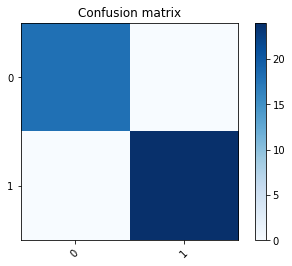

In [18]:
m=["0","1"]
plot_confusion_matrix(cm=matrice, classes=m)
#the y axis is the true label the X axis is the predicted label 

In [ ]:
#saving the weights of the model

In [19]:
model.save('Mobilenet/recog.h5')